機械学習特論 第5回 分類 k近傍法 Fashion-MNIST の分類

In [ ]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Fashion-MNISTデータセットをダウンロードして、実験用データを準備
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('Fashion-MNIST')
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
# 処理時間の都合から、70000枚の画像のうち7000枚を対象とする (各画像を均等に (straify=y))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1, stratify=_y) 

xの形状: (7000, 784)
yの形状: (7000,) <class 'numpy.ndarray'>


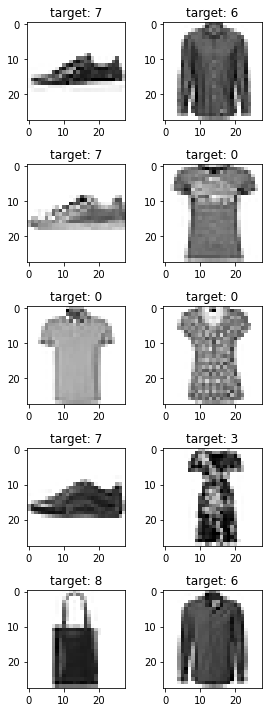

In [3]:
# ダウンロードしたデータセットを確認
print('xの形状:', x.shape)
print('yの形状:', y.shape, type(y))

# データセットに含まれる文字のイメージを表示 (2x5のレイアウトで最初の10画像)
rows, cols = 5, 2
fig, ax = plt.subplots(rows, cols, figsize=(4.0, 10.0), tight_layout=True)
for i in range(rows * cols):
    ax[i // cols][i % cols].imshow(x[i].reshape(28,28), cmap=plt.cm.gray_r)
    ax[i // cols][i % cols].set_title(f'target: {y[i]}')
plt.show()

In [6]:
# データセットに含まれる各画像数を確認
for i in range(10):
    n = 0
    for j in range(len(y)):
        if i == y[j]:
            n = n + 1
    print(f'{i}: {n}, ', end='')  # 各数字の画像数にバラツキあり

# データを学習用と検証用に分割 (検証用データに25%を割当て)
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1, stratify=y) # 各画像を均等に分割 (straify=y)
print('\n', len(x_train), len(x_test), len(y_train), len(y_test)) # それぞれのデータ数を確認

0: 700, 1: 700, 2: 700, 3: 700, 4: 700, 5: 700, 6: 700, 7: 700, 8: 700, 9: 700, 
 5250 1750 5250 1750


In [7]:
# k近傍法のモデルを学習データを利用して学習
clf_3 = KNeighborsClassifier(n_neighbors=3, # k を指定 (デフォルトは 5)
                             weights='uniform',  # 距離を考慮しない(uniform:デフォルト)、する(distance)
                             algorithm='auto', # 近傍点計算アルゴリズム (auto:デフォルト,ball_tree,kd_tree,brute)
                             leaf_size=30,  # ball_tree,kd_tree指定時のリーフサイズの設定 (デフォルトは 30)
                             p=2)  # 距離計算の次元 (2:デフォルト、1)
clf_3 = clf_3.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

# 学習したモデルの性能(正答率)を学習用データで評価
predict_3_train = clf_3.predict(x_train)
print('knn (k=3, train data) : accuracy_score', metrics.accuracy_score(y_train, predict_3_train))

# 学習したモデルの性能(正答率)を検証用データで評価
predict_3_test = clf_3.predict(x_test)
print('knn (k=3, test data) : accuracy_score', metrics.accuracy_score(y_test, predict_3_test))

knn (k=3, train data) : accuracy_score 0.8929523809523809
knn (k=3, test data) : accuracy_score 0.8028571428571428


0 : total 175 correct 142 precistion 0.8114285714285714
1 : total 175 correct 166 precistion 0.9485714285714286
2 : total 175 correct 125 precistion 0.7142857142857143
3 : total 175 correct 149 precistion 0.8514285714285714
4 : total 175 correct 126 precistion 0.72
5 : total 175 correct 128 precistion 0.7314285714285714
6 : total 175 correct 93 precistion 0.5314285714285715
7 : total 175 correct 157 precistion 0.8971428571428571
8 : total 175 correct 156 precistion 0.8914285714285715
9 : total 175 correct 163 precistion 0.9314285714285714


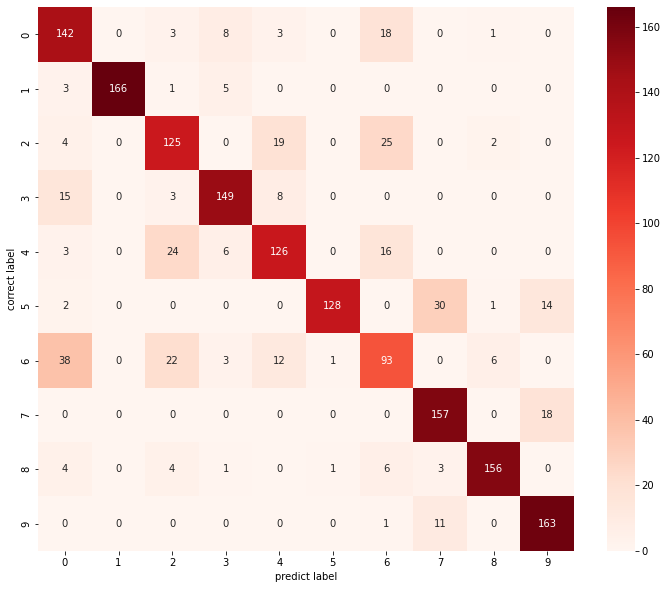

In [8]:
# 各画像の予測精度を確認
_p = predict_3_test.tolist()
for j in range(10):
    n = 0
    c = 0
    for i in range(len(_p)):
        if j == y_test[i]:
            n = n + 1
            if j == _p[i]:
                c = c + 1
    print(f'{j} : total {n} correct {c} precistion {c/n}')

# 混同行列を作成して、正解を縦軸、予測を横軸としてヒートマップを作成
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, _p) 
plt.figure(figsize = (12, 10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Reds")
plt.ylabel('correct label')
plt.xlabel('predict label')
plt.show()

13 gt 6 -> predict 2
15 gt 4 -> predict 6
50 gt 6 -> predict 8
53 gt 6 -> predict 0
70 gt 9 -> predict 7
72 gt 6 -> predict 0
88 gt 6 -> predict 2
89 gt 4 -> predict 2
116 gt 6 -> predict 0
120 gt 3 -> predict 0
126 gt 6 -> predict 2
130 gt 1 -> predict 3
158 gt 4 -> predict 2
168 gt 6 -> predict 0
174 gt 4 -> predict 2
179 gt 4 -> predict 2
190 gt 4 -> predict 3
200 gt 8 -> predict 3
209 gt 4 -> predict 2
221 gt 4 -> predict 2
222 gt 6 -> predict 4
230 gt 6 -> predict 3
241 gt 6 -> predict 0
254 gt 5 -> predict 9
257 gt 2 -> predict 4
269 gt 6 -> predict 2
285 gt 6 -> predict 4
289 gt 2 -> predict 4
304 gt 6 -> predict 4
321 gt 3 -> predict 6
322 gt 0 -> predict 6
330 gt 2 -> predict 4
349 gt 0 -> predict 6
365 gt 5 -> predict 7
372 gt 6 -> predict 2
380 gt 0 -> predict 6
382 gt 3 -> predict 6
387 gt 2 -> predict 4
388 gt 4 -> predict 2
389 gt 7 -> predict 9
392 gt 3 -> predict 0
400 gt 6 -> predict 4
404 gt 6 -> predict 2
412 gt 4 -> predict 2
413 gt 3 -> predict 6
415 gt 2 -> predic

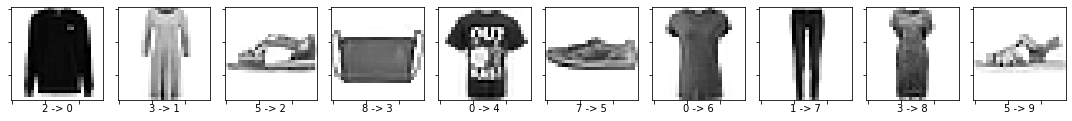

In [37]:
# 予測誤った画像のインデックスと正解と誤答を確認
for i in range(len(_p)):
    if _p[i] != y_test[i]:
        print(i, 'gt', y_test[i], '-> predict', _p[i])

# データセットに含まれる予測を誤った文字のイメージを表示 (5x2のレイアウトで)
img_no = [53, 1667, 13, 130, 2772, 834, 321, 365, 455, 389]
img_p = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rows, cols = 1, 10
fig, ax = plt.subplots(rows, cols, figsize=(15.0, 2.0), tight_layout=True)
for i in range(len(img_no)):
    ax[i].imshow(x[img_no[i]].reshape(28,28), cmap="binary", interpolation="nearest")
    ax[i].tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
    ax[i].set_xlabel(f'{y[img_no[i]]} -> {img_p[i]}')
plt.show()

5250 1750 5250 1750
(5250, 784) (5250,)
k=1 (train) 正解率 1.0 (test) 正解率 0.8028571428571428
k=2 (train) 正解率 0.912952380952381 (test) 正解率 0.7994285714285714
k=3 (train) 正解率 0.8946666666666667 (test) 正解率 0.8085714285714286
k=4 (train) 正解率 0.8784761904761905 (test) 正解率 0.8188571428571428
k=5 (train) 正解率 0.865904761904762 (test) 正解率 0.8182857142857143
k=6 (train) 正解率 0.8603809523809524 (test) 正解率 0.8154285714285714
k=7 (train) 正解率 0.8508571428571429 (test) 正解率 0.8228571428571428
k=8 (train) 正解率 0.8455238095238096 (test) 正解率 0.8165714285714286
k=9 (train) 正解率 0.8422857142857143 (test) 正解率 0.8165714285714286
k=10 (train) 正解率 0.8415238095238096 (test) 正解率 0.8171428571428572
k=11 (train) 正解率 0.8354285714285714 (test) 正解率 0.8142857142857143
k=12 (train) 正解率 0.8331428571428572 (test) 正解率 0.8154285714285714
k=13 (train) 正解率 0.8278095238095238 (test) 正解率 0.8148571428571428
k=14 (train) 正解率 0.8278095238095238 (test) 正解率 0.8148571428571428
k=15 (train) 正解率 0.824952380952381 (test) 正解率 0.81142857142857

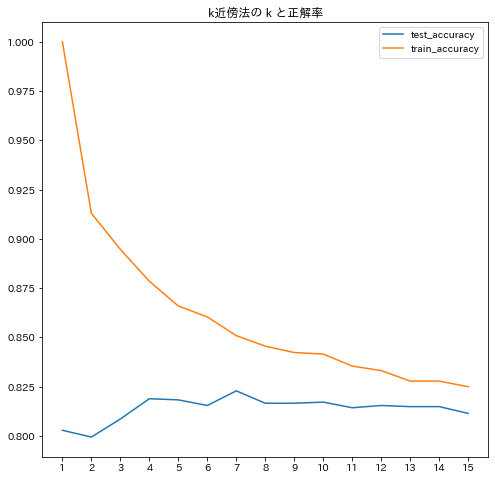

In [9]:
import statistics
import japanize_matplotlib

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
i = 0
k = []
test_accuracy = []
train_accuracy = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print(len(x_train), len(x_test), len(y_train), len(y_test))
print(x_train.shape, y_train.shape)

for _k in range(1, 16):
    # k近傍法で学習データを学習 (kは1-15まで設定)
    clf = KNeighborsClassifier(n_neighbors=_k, weights='uniform', algorithm='auto', p=2)
    clf = clf.fit(x_train, y_train)  # * y_trainの列指定はwarning回避のため *

    # 学習用データに対する正解率を計算
    predict_train = clf.predict(x_train)
    _train_accuracy = metrics.accuracy_score(y_train, predict_train)
    
    # 検証用データに対する正解率を計算
    predict_test = clf.predict(x_test)
    _test_accuracy = metrics.accuracy_score(y_test, predict_test)

    # 学習用データと検証用データにおける正解率を表示
    print(f'k={_k}', '(train) 正解率', _train_accuracy, '(test) 正解率', _test_accuracy)

    # kを変えた場合の学習用データと検証用データの正解率グラフのデータを準備
    k.append(_k)
    train_accuracy.append(_train_accuracy)
    test_accuracy.append(_test_accuracy)


# 各決定係数をヒストグラムに表示 (ビンの幅・数を揃えて、透過色で重ね合わせて表示)
ax.set_title(f'k近傍法の k と正解率')
ax.plot(k, test_accuracy, label='test_accuracy')
ax.plot(k, train_accuracy, label='train_accuracy')
ax.set_xticks(np.arange(1, 16, step=1))
ax.legend()  # loc='upper left'

plt.show()

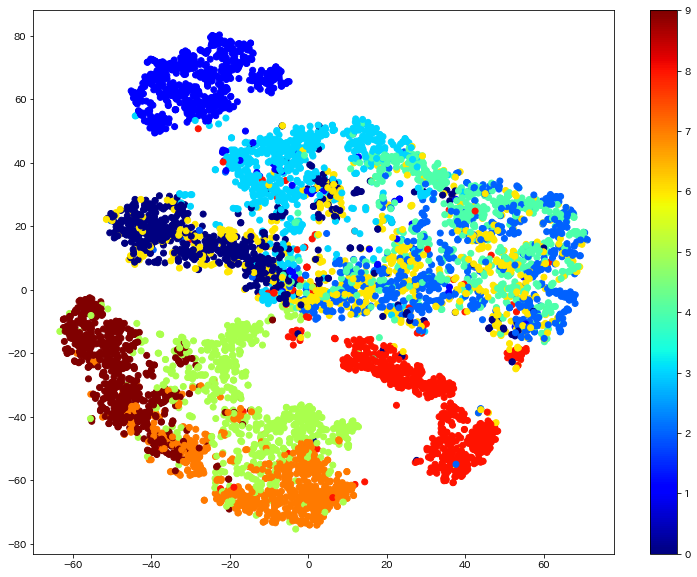

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', learning_rate='auto')
x_reduced  = tsne.fit_transform(x)

plt.figure(figsize=(13,10))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y, cmap="jet")
plt.colorbar()
plt.show()